In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/fakenews.csv')

1= unrealiable

0= realiable

In [2]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(18285, 5)

In [4]:
df = df.dropna()

In [6]:
df.reset_index(inplace=True)

In [7]:
df.head(7)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0


In [8]:
## Get dependent feature
y = df['label']

## Get inependent feature

X = df.drop('label',axis=1)

In [10]:
X.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [11]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [12]:
messages = X.copy()
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
# data cleaning
import nltk
#nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus[6]

'beno hamon win french socialist parti presidenti nomin new york time'

In [19]:
# Applying Countervectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [25]:
cv.get_feature_names()[:29]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf']

In [26]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [28]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acknowledg emf,acknowledg emf damag,aclu,acquit,acquitt,acr,across,act,act like,act new,act new york,action,...,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,year sinc,yemen,yet,yet anoth,yiannopoulo,yield,yo,york,york citi,york new,york new york,york state,york time,yorker,young,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
X.shape

(18285, 5000)

In [22]:
y.shape

(18285,)

In [23]:
# Divide the dataset into Train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [29]:
## lets apply MultinomialNB Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[3044  345]
 [ 247 2399]]
0.9019055509527755
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3389
           1       0.87      0.91      0.89      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



In [38]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


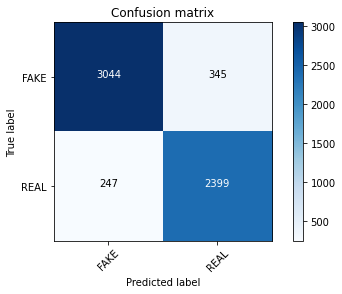

In [39]:
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## Passive Agressive Classifer Algorithm

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier() 

In [43]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[3131  258]
 [ 230 2416]]
0.9191383595691798
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3389
           1       0.90      0.91      0.91      2646

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035



# Multinomial Classifier with Hyperparameter

In [48]:
from sklearn import metrics
classifier = MultinomialNB(alpha=0.1)

In [49]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8903065451532726
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [50]:
## Get Feature names
feature_names = cv.get_feature_names()
feature_names

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 '

In [51]:
## Most real 
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [52]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new'),
 (-10.794984555596727, 'american new york'),
 (-10.794984555596727, 'ami'),
 (-10.794984555596727, 'ami schumer'),
 (-10.794984555596727, 'amp'),
 (-10.794984555596727, 'ann'),
 (-10.794984555596727, 'ann coulter'),
 (-10.794984555596

# Lets implement this by LSTM using Word embedding technique

In [55]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data/fakenews.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [56]:
### Drop NaN value
df = df.dropna()
df.reset_index(inplace=True)

In [57]:
## Get the Independent Features
X=df.drop('label',axis=1)

## Get the Dependent features
y=df['label']

In [58]:
import tensorflow as tf
# for word embedding embedding layer
from tensorflow.keras.layers import Embedding
## for lstm we required equal number of input thats y we provide a padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
## for one_hot 
from tensorflow.keras.preprocessing.text import one_hot
## for Lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [59]:
# first we define vocabulary size 
# remeber we define hw many here we define 5000 , 10000 also we define
voc_size = 5000

### Onehot Representation

In [61]:
messages = X.copy()

In [62]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [64]:
## lets do some text preprocessing
corpus = []
for i in range(0, len(messages)):
    
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [65]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [66]:
## nw do one hot 
onehot_repr = [one_hot(words,voc_size)for words in corpus]
onehot_repr

[[4841, 2932, 4363, 3280, 3273, 2646, 2782, 714, 1984, 3135],
 [1706, 1542, 2348, 2514, 3284, 4691, 3229],
 [208, 1463, 1350, 2651],
 [4745, 1627, 826, 2124, 3662, 2994],
 [2306, 3284, 3364, 2934, 2541, 3673, 3284, 2225, 313, 3964],
 [642,
  4777,
  3396,
  2363,
  3205,
  1500,
  3681,
  2677,
  3354,
  572,
  1382,
  402,
  4762,
  746,
  3229],
 [4342, 4932, 585, 1555, 4909, 2545, 4499, 4743, 707, 2819, 1899],
 [3069, 1848, 456, 2880, 214, 874, 1500, 3016, 707, 2819, 1899],
 [4090, 3197, 4063, 1988, 901, 4148, 4594, 324, 1500, 2537],
 [3551, 962, 1394, 586, 1719, 336, 637, 4396],
 [4296, 463, 3516, 2529, 2128, 1623, 15, 2834, 4102, 3644, 3986],
 [2124, 1572, 3273, 4148, 1500, 214],
 [1953, 4156, 1105, 249, 2949, 1504, 241, 4822, 4880],
 [1140, 2623, 2260, 3029, 4380, 672, 2837, 707, 2819, 1899],
 [2463, 2809, 2328, 3889, 1833, 707, 2819, 1899],
 [3718, 3205, 173, 3482, 4308, 1495, 229, 2615, 3255, 2107],
 [4625, 275, 1542],
 [3846, 2140, 4783, 2444, 1500, 3400, 1741, 3229],
 [2230, 

### Embedding Representation


In [67]:
sent_length =20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  714 1984 3135]
 [   0    0    0 ... 3284 4691 3229]
 [   0    0    0 ... 1463 1350 2651]
 ...
 [   0    0    0 ...  707 2819 1899]
 [   0    0    0 ... 3555 4706 1242]
 [   0    0    0 ...  281 4301  794]]


In [68]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4841,
       2932, 4363, 3280, 3273, 2646, 2782,  714, 1984, 3135], dtype=int32)

In [70]:
### CREATING MODEL
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
len(embedded_docs),y.shape

(18285, (18285,))

In [73]:

import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [74]:

X_final.shape,y_final.shape

((18285, 20), (18285,))

In [75]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [77]:
## Model Training

### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 6s 34ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.6081 - val_accuracy: 0.9137
Epoch 2/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.5557 - val_accuracy: 0.9152
Epoch 3/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.5484 - val_accuracy: 0.9135
Epoch 4/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.6976 - val_accuracy: 0.9140
Epoch 5/10
192/192 [==============================] - 6s 33ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.6702 - val_accuracy: 0.9130
Epoch 6/10
192/192 [==============================] - 6s 33ms/step - loss: 8.8962e-04 - accuracy: 0.9998 - val_loss: 0.7568 - val_accuracy: 0.9123
Epoch 7/10
192/192 [==============================] - 6s 33ms/step - loss: 2.1032e-04 - accuracy: 1.0000 - val_loss: 0.7844 - val_accuracy

In [78]:
# prediction
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3145  274]
 [ 251 2365]]
0.9130074565037283
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3419
           1       0.90      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [80]:
## Adding dropout 
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
## Model Training

### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
192/192 [==============================] - 7s 35ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.5313 - val_accuracy: 0.9168
Epoch 2/20
192/192 [==============================] - 7s 34ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.5816 - val_accuracy: 0.9145
Epoch 3/20
192/192 [==============================] - 7s 35ms/step - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.6048 - val_accuracy: 0.9112
Epoch 4/20
192/192 [==============================] - 7s 34ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 0.6002 - val_accuracy: 0.9140
Epoch 5/20
192/192 [==============================] - 7s 34ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.6013 - val_accuracy: 0.9135
Epoch 6/20
192/192 [==============================] - 7s 34ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.5242 - val_accuracy: 0.9157
Epoch 7/20
192/192 [==============================] - 6s 34ms/step - loss: 0.0069 - accuracy: 0.9973 - val_loss: 0.6683 - val_accuracy: 0.9150

In [85]:
# prediction
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [86]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3128  291]
 [ 241 2375]]
0.911847555923778
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3419
           1       0.89      0.91      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [87]:
## Lets do with bidirection Lstm
from tensorflow.keras.layers import Bidirectional

In [88]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
192/192 [==============================] - 13s 51ms/step - loss: 0.4380 - accuracy: 0.7601 - val_loss: 0.2024 - val_accuracy: 0.9180
Epoch 2/20
192/192 [==============================] - 9s 47ms/step - loss: 0.1328 - accuracy: 0.9494 - val_loss: 0.2538 - val_accuracy: 0.9170
Epoch 3/20
192/192 [==============================] - 9s 47ms/step - loss: 0.0794 - accuracy: 0.9711 - val_loss: 0.2118 - val_accuracy: 0.9163
Epoch 4/20
192/192 [==============================] - 9s 47ms/step - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.2852 - val_accuracy: 0.9162
Epoch 5/20
192/192 [==============================] - 9s 47ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.3176 - val_accuracy: 0.9087
Epoch 6/20
192/192 [==============================] - 9s 46ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.3800 - val_accuracy: 0.9075
Epoch 7/20
192/192 [==============================] - 9s 47ms/step - loss: 0.0255 - accuracy: 0.9925 - val_loss: 0.4523 - val_accuracy: 0.909

In [93]:
# prediction
y_pred=model1.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [94]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3114  305]
 [ 269 2347]]
0.9048881524440763
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.88      0.90      0.89      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.91      0.90      0.90      6035

